In [1]:
import os.path
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import matplotlib.cm as cm

In [2]:
from IPython.core.pylabtools import figsize
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

# popinfo

In [69]:
popinfo = pd.read_csv(os.path.join('data','POPINFO.txt'), sep = '\t')
popnames = popinfo.sort_values('CLUSTER')['POPNAME'].tolist()
popnames

['Hamma Hamma River',
 'Nisqually Kalama Creek',
 'Lilliwaup Creek',
 'Sherwood River Fall',
 'Sherwood River Summer',
 'Skookum Creek',
 'Snohomish River',
 'Squakum Creek',
 'Stillaguamish River',
 'Hoodsport Hatchery']

# load fst

In [28]:
fst_mat = pd.read_csv(os.path.join('results', 'batch_4','pop_analysis','poptree2','fst mat.txt' ), 
            sep = '\t', skipinitialspace=False, header = None)
fst_mat.index = range(1,10)
fst_mat.columns = range(2,11)
fst_mat.insert(0, 1, np.nan)
fst_mat.loc[10] = np.nan
#np.fill_diagonal(fst_mat.values, 0)
fst_mat = fst_mat.replace({np.nan:0})
fst_mat

,1,2,3,4,5,6,7,8,9,10
1,0,0.064,0.053,0.049,0.052,0.057,0.057,0.066,0.062,0.061
2,0,0.000,0.028,0.026,0.029,0.026,0.027,0.038,0.030,0.032
3,0,0.000,0.000,0.016,0.020,0.023,0.017,0.029,0.022,0.009
4,0,0.000,0.000,0.000,0.003,0.010,0.021,0.032,0.026,0.026
5,0,0.000,0.000,0.000,0.000,0.012,0.026,0.037,0.031,0.030
6,0,0.000,0.000,0.000,0.000,0.000,0.024,0.036,0.029,0.029
7,0,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.003,0.023
8,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.033
9,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.028
10,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# mirror over the diagonal

In [31]:
fst_mat = fst_mat + fst_mat.T

# draw plot

In [73]:
figsize(14,14)
mask = np.zeros_like(fst_mat, dtype=np.bool)
mask[np.diag_indices_from(mask)] = True
#mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(as_cmap=True, start = 1, rot=.10, light=1, dark = .5)


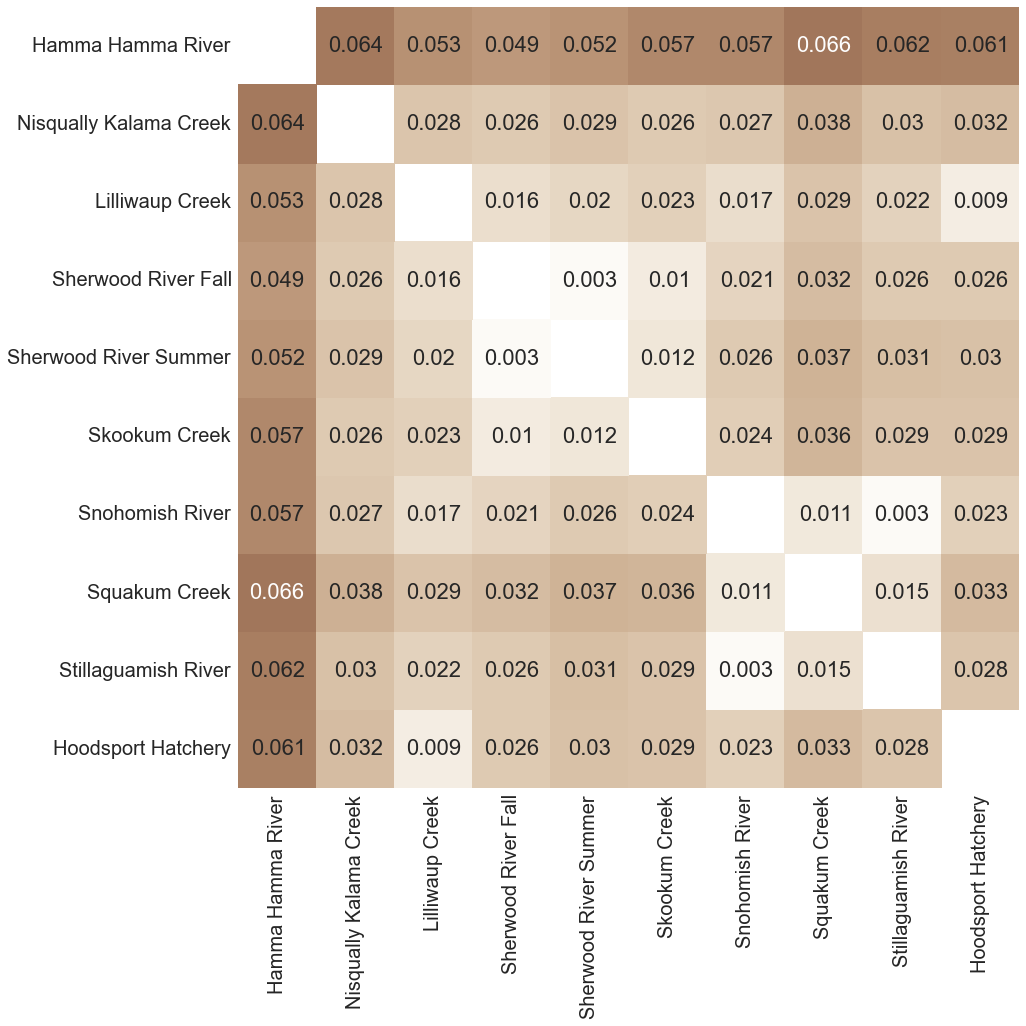

In [74]:
sns.heatmap(fst_mat, annot=True, annot_kws = {'size': 22, 'weight':'normal'}, 
            square = True, linewidths=0, cbar = False, mask = mask, cmap = cmap, 
           xticklabels = popnames, yticklabels = popnames, 
           )
plt.savefig(os.path.join('paper', 'figures','fst mat.txt' ))

In [24]:
scipy.spatial.distance.squareform(fst_mat.values)

ValueError: Distance matrix 'X' must be symmetric.